# Employee Salary Machine Learning Model

## Project Overview

This project includes this notebook that walks through the development of the machine learning model. There is also a streamlit web app that allows for live use of the model and a dashboard to give a high level overview of key metrics such as gender, age and genderXage salary breakdowns. Click here to view the web app.

## Using Machine Learning to Predict Employee Salaries: A People Analytics Solution

This model can serve as a powerful tool in people analytics consulting, helping organisations make data-driven decisions about workforce management and compensation strategies. By predicting employee salaries based on key features (such as role, location, experience, and performance), the model can support the following applications:

1. **Benchmarking Compensation:** Organisations can use the model to identify whether their salary structures align with industry standards or if adjustments are needed to remain competitive in attracting and retaining talent.
2. **Reducing Pay Inequities:** The model can highlight inconsistencies or biases in compensation, helping HR teams create fairer, more equitable pay systems.
3. **Strategic Workforce Planning:** By integrating salary predictions into workforce planning, organisations can estimate budget requirements for future hiring or promotions, ensuring resources are allocated effectively.
4. **Enhancing Employee Engagement:** Fair and transparent compensation fosters employee trust and satisfaction. This model equips HR professionals with insights to communicate the rationale behind salary decisions clearly.

With machine learning, these predictions are based on patterns and relationships in historical data, providing a more objective foundation for decision-making. While the model doesn't replace human judgment, it complements it by offering data-driven insights that can guide conversations and strategies within organisations.

## Executive Summary 

The model perfomed well.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [16]:
df = pd.read_csv("/Users/lukecarroll/Documents/[01] Coding/[01] Datasets/HRDataset_v14.csv")
df = df.drop(columns=["Employee_Name", "ManagerName", "State", "Zip", 'GenderID', 'EmpStatusID', 'MaritalStatusID', 'PositionID', 'MarriedID', 'ManagerID', 'EmpID', 'DeptID'])

## Dataset Descriptives

This section provides a high-level overview of the dataset, focusing on identifying missing values and detecting highly skewed data. Understanding these aspects is important, as they can impact the performance and accuracy of the model.

In [17]:
df.sample(5, random_state=15)

,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
132,3,0,49920,1,Administrative Assistant,09/16/85,F,Married,US Citizen,No,Black or African American,2/16/2015,4/15/2015,"no-call, no-show",Terminated for Cause,Admin Offices,Indeed,Fully Meets,3.24,3,4,4/15/2015,0,6
248,3,0,57975,0,Production Technician II,04/26/86,M,Married,US Citizen,No,White,8/30/2010,NaN,N/A-StillEmployed,Active,Production,CareerBuilder,Fully Meets,4.10,3,0,1/10/2019,0,13
98,3,0,67251,0,Area Sales Manager,08/28/63,M,Single,US Citizen,No,Black or African American,9/6/2011,NaN,N/A-StillEmployed,Active,Sales,CareerBuilder,Fully Meets,4.30,3,0,1/27/2019,2,7
79,3,0,62514,0,Production Technician I,09/23/73,F,Married,US Citizen,No,White,4/26/2010,NaN,N/A-StillEmployed,Active,Production,Google Search,Fully Meets,2.90,3,0,1/21/2019,0,6
86,2,0,99280,1,Software Engineer,05/15/87,F,Married,US Citizen,No,Black or African American,5/2/2011,6/5/2013,attendance,Terminated for Cause,Software Engineering,Indeed,Needs Improvement,2.10,5,4,8/10/2012,4,19


In [18]:
df.describe()

,PerfScoreID,FromDiversityJobFairID,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,2.977492,0.093248,69020.684887,0.334405,4.110000,3.890675,1.218650,0.414791,10.237942
std,0.587072,0.291248,25156.636930,0.472542,0.789938,0.909241,2.349421,1.294519,5.852596
min,1.000000,0.000000,45046.000000,0.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,55501.500000,0.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,3.000000,0.000000,62810.000000,0.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,3.000000,0.000000,72036.000000,1.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,4.000000,1.000000,250000.000000,1.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [19]:
df.columns

Index(['PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'Position',
       'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino',
       'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason',
       'EmploymentStatus', 'Department', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [20]:
df = df.dropna(subset=['Salary'])

## Computing and Formatting Age Variable

There is an issue with ```pd.to_datetime``` where two-digit years less than 70 are incorrectly converted to years in the 2000s instead of the 1900s. The code block below addresses this by identifying any ```DOB``` values greater than 2022 and subtracting 100 years to correct the date.

In [21]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['DOB'] = df['DOB'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2022 else x)
df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365 

df['AgeGroup'] = pd.cut(df['Age'], 
                         bins=range(0, 101, 10), 
                         labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'],
                         right=False)

## Data Exploration

Here we will explore the data, including understanding the relationship between salary and both gender and age.

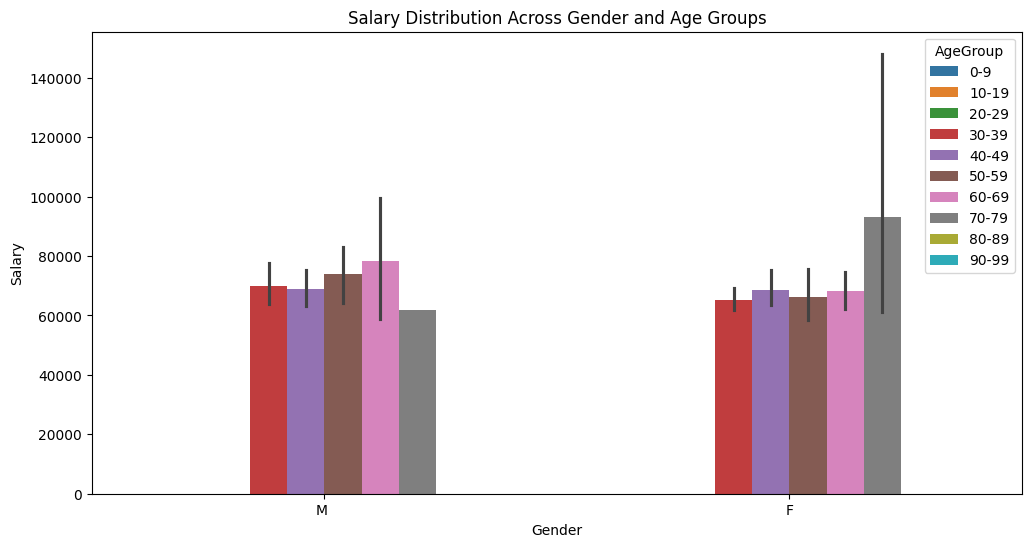

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='Salary', hue='AgeGroup', data=df)
plt.title("Salary Distribution Across Gender and Age Groups")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.show()

<Figure size 1200x600 with 0 Axes>

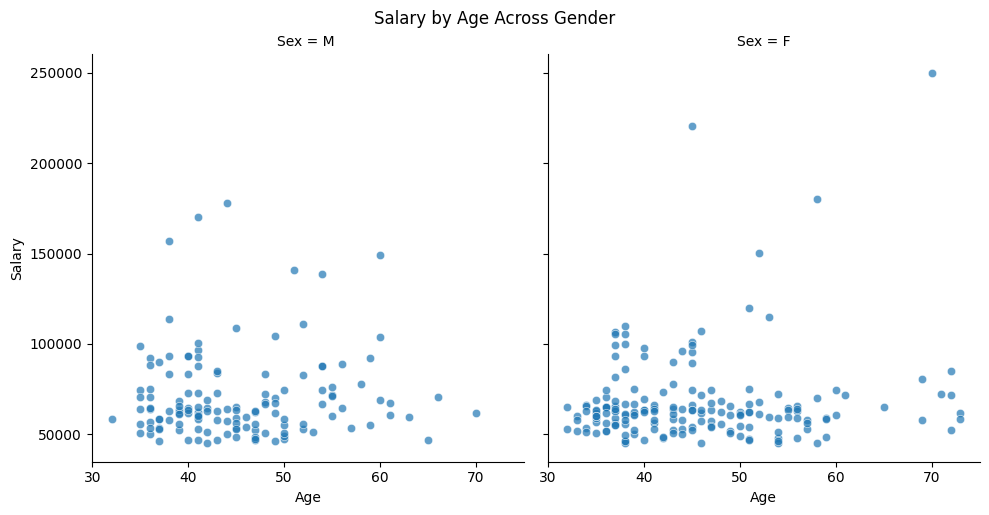

In [29]:
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col="Sex", height=5, aspect=1)
g.map(sns.scatterplot, "Age", "Salary", alpha=0.7)
g.set_axis_labels("Age", "Salary")
g.fig.suptitle("Salary by Age Across Gender", y=1.02)
plt.show()

/var/folders/mk/nkw282756n1fph48yl8yn0bm0000gn/T/ipykernel_57134/1187013597.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Salary', index='AgeGroup', columns='Sex', aggfunc='mean')


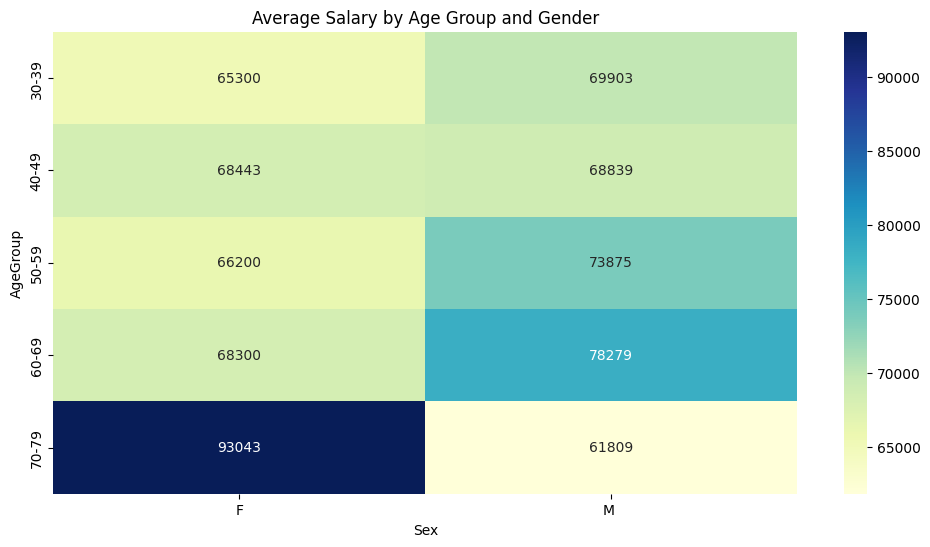

In [31]:
plt.figure(figsize=(12, 6))
pivot_table = df.pivot_table(values='Salary', index='AgeGroup', columns='Sex', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Salary by Age Group and Gender")
plt.show()

## Outcome Varaible

Creating a graph of the salary distribution provides a visual representation of the data, enabling us to identify patterns, such as skewness, and detect potential outliers. Visual inspection is an essential first step in understanding the underlying structure of the data and assessing whether outlier removal is necessary. 

Outliers, particularly in machine learning models, can have a disproportionate influence on model performance, potentially leading to biase predictive accuracy. While this may limit the model's applicabilition for fringe cases, it enhances its reliability for the majority of the dataset, where predictions are most relevant.

<Axes: xlabel='Salary', ylabel='Count'>

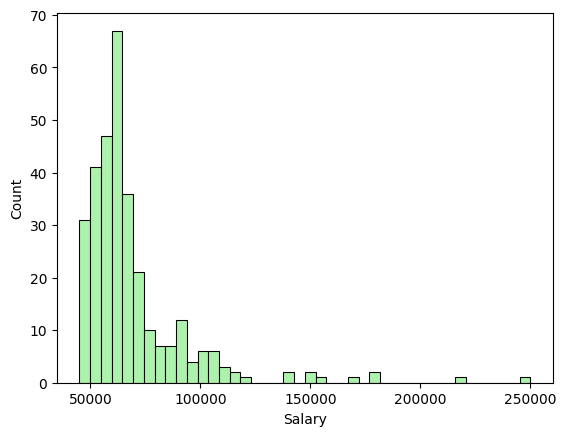

In [476]:
sns.histplot(df['Salary'], color='lightgreen')

The histogram reveals a strongly positively skewed distribution of salaries, with the majority of values clustered below 100,000 and a tail extending beyond 125,000. While no transformations will be applied to address the skew at this stage, its impact on model accuracy will be evaluated during later stages of development.

Outliers are noticeable, particularly for salaries exceeding 125,000. To manage these, salaries above the 99th percentile will be excluded from the dataset. Although this approach may reduce the model's generalisability to high-income cases, machine learning models tend to perform less reliably on such fringe cases, making this a reasonable trade-off.


<Axes: xlabel='Salary', ylabel='Count'>

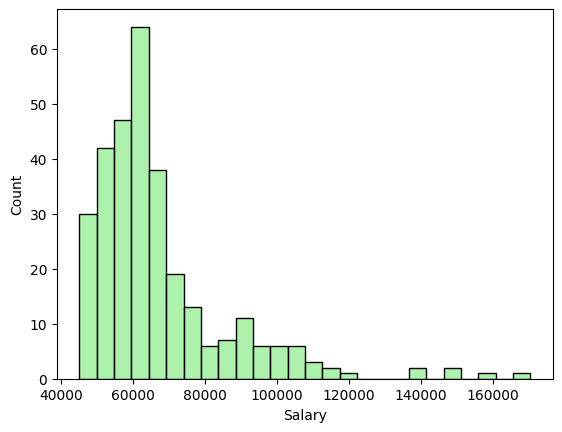

In [477]:
df = df[df['Salary'] < df['Salary'].quantile(0.99)]
sns.histplot(df['Salary'], color='lightgreen',)

## Computing New Variables

This code block generates several composite variables, such as ```Age``` and ```Tenure```, as well as ```DaysSinceTermination``` and ```DaysSinceLastPerformanceReview```. While these variables are less relevant to the current salary model, they may be valuable in future analyses, such as exploring attrition patterns or other machine learning applications.



In [ ]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors='coerce')
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'], errors='coerce')

df['HireAge'] = (pd.to_datetime(df['DateofHire']) - df['DOB']).dt.days // 365 
df['DaysSinceTermination'] = (pd.to_datetime('today') - df['DateofTermination']).dt.days
df['DaysSinceLastPerformanceReview'] = (pd.to_datetime('today') - df['LastPerformanceReview_Date']).dt.days
df['Tenure'] = np.where(
    df['Termd'] == 1,
    (df['DateofTermination'] - df['DateofHire']).dt.days,
    (pd.Timestamp('today') - df['DateofHire']).dt.days
)

In [479]:
df.sample(5, random_state=15)

,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,HireAge,DaysSinceTermination,DaysSinceLastPerformanceReview,Tenure
38,3,0,52846,0,Production Technician I,1983-02-02,M,Single,US Citizen,No,Black or African American,2014-03-31,NaT,N/A-StillEmployed,Active,Production,LinkedIn,Fully Meets,4.43,3,0,2019-02-01,0,14,41,31,NaN,2125,3893.0
110,3,0,53018,0,Production Technician I,1992-06-18,F,Single,US Citizen,Yes,White,2013-11-11,NaT,N/A-StillEmployed,Active,Production,Indeed,Fully Meets,4.30,5,0,2019-02-18,0,7,32,21,NaN,2108,4033.0
44,3,0,60380,0,Production Technician I,1983-08-24,M,Single,US Citizen,No,White,2013-07-08,NaT,N/A-StillEmployed,Active,Production,LinkedIn,Fully Meets,3.80,5,0,2019-01-14,0,4,41,29,NaN,2143,4159.0
204,3,0,66738,0,Production Technician II,1985-11-23,F,Single,US Citizen,No,White,2014-11-10,NaT,N/A-StillEmployed,Active,Production,Indeed,Fully Meets,4.53,5,0,2019-01-16,0,5,39,28,NaN,2141,3669.0
111,4,1,59892,0,Production Technician I,1969-09-29,M,Divorced,US Citizen,No,Black or African American,2011-07-11,NaT,N/A-StillEmployed,Active,Production,Diversity Job Fair,Exceeds,4.50,4,0,2019-02-18,0,1,55,41,NaN,2108,4887.0


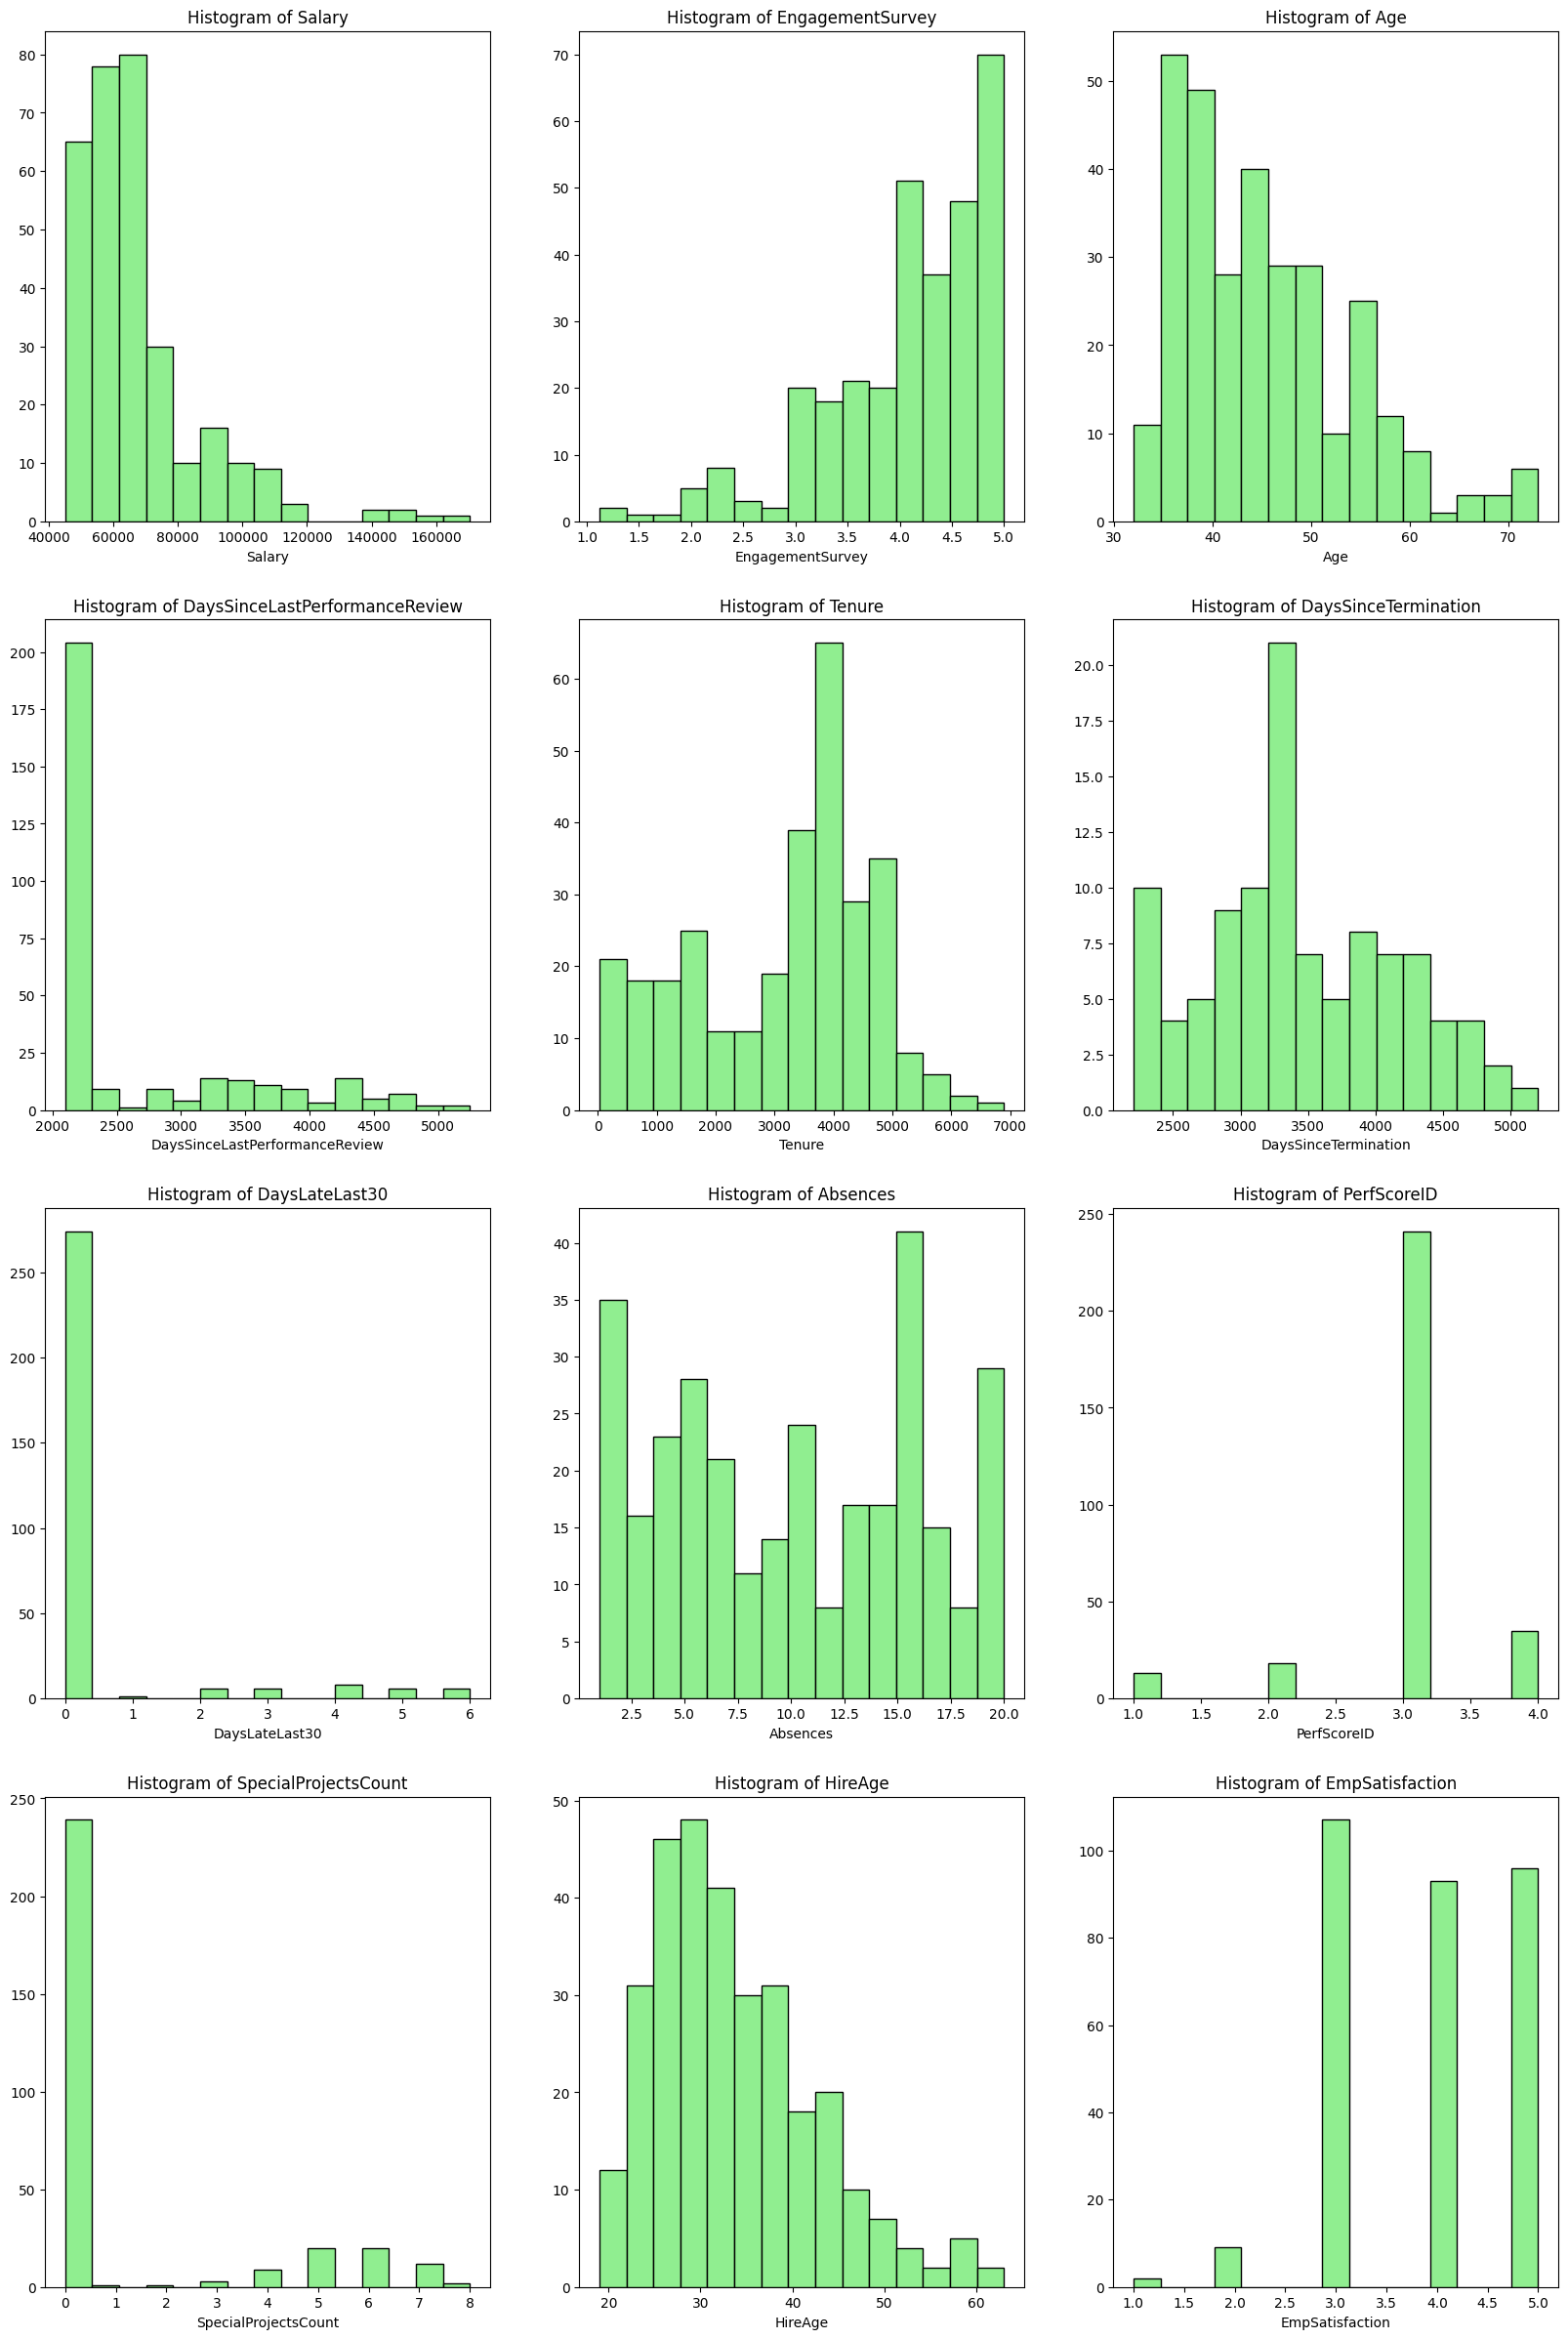

In [480]:
categorical_cols = ['Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 
                    'EmploymentStatus', 'Department', 'RecruitmentSource', 
                    'PerformanceScore', 'Position', 'TermReason']

ignore_cols = categorical_cols + ['LastPerformanceReview_Date', 'DateofHire', 'DateofTermination', 
                                'DOB',  'FromDiversityJobFairID',  'Termd']

columns_to_plot = list(set(df.columns).difference(ignore_cols))

columns_to_plot  = list(reversed(columns_to_plot))

fig, axes = plt.subplots(round(len(list(columns_to_plot))/3 + 0.4), 3, figsize=(20, 30)) 
axes = axes.flatten()  

for idx, column in enumerate(columns_to_plot):
    axes[idx].hist(df[column], bins=15, color='lightgreen', edgecolor='black')
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].set_xlabel(column) 

plt.show()

In [481]:
# Pie graphs go here


### Transforming Variables

To include categorical variables such as department in the model, these variables will be one-hot encoded. This process creates a new binary column for each department type, where a value of 1 indicates that the data point (employee) belongs to that department, and a value of 0 indicates they do not. This transformation is repeated for all departments, ensuring the categorical data is properly represented in the model.

One-hot encoding is preferred over label encoding, which assigns arbitrary numeric values to categories based on their order in the dataset. Label encoding can unintentionally introduce ordinal relationships between categories (e.g., "Male" = 0, "Female" = 1), leading regression models to assume a ranking or hierarchy that doesn't exist. By using one-hot encoding, we avoid this issue, as it represents categories independently without implying any order.

In [482]:
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

# Creating the Model
Using the RandomForrestRegressor function to run a regression model with the features below.

## Preparing Date Variables

Since the RandomForestRegressor model cannot work directly with date data types, we will convert the Date variables into numerical features. Specifically, we will extract the year and month from the DateofHire variable and represent them as numeric values. This transformation allows the model to process the dates as features while preserving useful information.

In [483]:
df['HireYear'] = df['DateofHire'].dt.year.astype(int)
df['HireMonth'] = df['DateofHire'].dt.month.astype(int)
df = df.drop(['DateofHire', 'DateofTermination', 'DOB', 'LastPerformanceReview_Date'], axis = 1)

In [484]:
pd.options.display.max_seq_items = 2000
df.columns

Index(['PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences', 'Age', 'HireAge', 'DaysSinceTermination',
       'DaysSinceLastPerformanceReview', 'Tenure', 'Sex_F', 'Sex_M ',
       'MaritalDesc_Divorced', 'MaritalDesc_Married', 'MaritalDesc_Separated',
       'MaritalDesc_Single', 'MaritalDesc_Widowed',
       'CitizenDesc_Eligible NonCitizen', 'CitizenDesc_Non-Citizen',
       'CitizenDesc_US Citizen', 'HispanicLatino_No', 'HispanicLatino_Yes',
       'HispanicLatino_no', 'HispanicLatino_yes',
       'RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian',
       'RaceDesc_Black or African American', 'RaceDesc_Hispanic',
       'RaceDesc_Two or more races', 'RaceDesc_White',
       'EmploymentStatus_Active', 'EmploymentStatus_Terminated for Cause',
       'EmploymentStatus_Voluntarily Terminated', 'Department_Admin Offices',
       'Department_IT/IS', 'Department_Produ

In [485]:
features = df.loc[:, df.columns != 'Salary'].columns

In [486]:
X = df[features]
y = df['Salary']

In [487]:
# corrs = df.corr()['Salary'].sort_values(ascending=False).drop('Salary')

# plt.figure(figsize=(10, 6)) 
# plt.bar(corrs.keys(), corrs.values)

# plt.title('Correlation of Features with Attrition')
# plt.xlabel('Features')
# plt.ylabel('Correlation')

# plt.xticks(rotation=45, ha='right')

# plt.tight_layout() 
# plt.show()

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [489]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [490]:
y_pred = rf_model.predict(X_test)

In [491]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [492]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 7282.538709677419
Mean Squared Error: 117883030.13010968
Root Mean Squared Error: 10857.395181631258
R2 Score: 0.6483026492950381


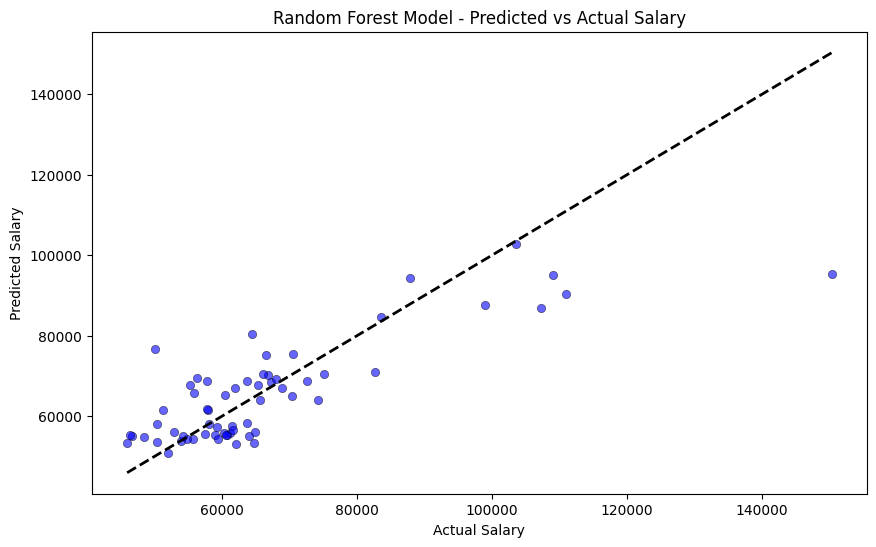

In [493]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='b', edgecolor="k")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest Model - Predicted vs Actual Salary")

plt.show()
